<a href="https://www.kaggle.com/code/leonardoterra/eda-ads-behavior-analysis?scriptVersionId=217833945" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Dataset**
--

# **Social Media Buying Dataset**
    Machine Learning Classification model

## **Data Description**
This dataset contains information about individuals and their response to a particular advertisement campaign on social media. The dataset includes the following columns:

* **Age:** Age of the individual in years.
* **EstimatedSalary:** Estimated salary of the individual.
* **Purchased:** Binary variable indicating whether the individual made a purchase (1) or not (0) after seeing the advertisement.

i. **Age:**

Data Type: Integer, Description: Represents the age of the individual in years.

ii. **EstimatedSalary:**

Data Type: Integer, Description: Indicates the estimated salary of the individual.

iii. **Label:**

Data Type: Object, Description: Indicates the Genaration of the individual based on its age.

iiii. **Purchased:**

Data Type: Integer (0 or 1), Description: Indicates whether the individual made a purchase (1) or not (0) after seeing the advertisement.

## **Additional Information**
This dataset can be used to analyze the relationship between age, estimated salary, and purchase behavior in response to the advertisement. The dataset appears to be suitable for binary classification tasks, where the goal might be to predict whether an individual will make a purchase based on age and estimated salary. Exploratory data analysis (EDA) techniques can be applied to understand patterns and correlations within the dataset before building predictive models.

------------

## **Import Libraries**
---------

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# To avoid warnings        
import warnings 
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-advertisement-dataset/social_ads.csv


In [2]:
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Data Analysis & Visualization**

## **Organizing Dataset**

In [3]:
df = pd.read_csv('/kaggle/input/social-advertisement-dataset/social_ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.rename(columns = {'EstimatedSalary': 'estimated_salary', 'Age': 'age', 'Purchased': 'purchased' }, inplace = True)

In [5]:
def label(row):
    if row <= 27:
        return "Gen Z"
    elif row >= 28 and row <= 43:
        return "Millennials"
    elif row >= 44 and row <= 49:
        return "Gen X"
    else:
        return 'Boomers'
    
df['label'] = df['age'].apply(label)

In [6]:
df_eda = df[['age','estimated_salary','label','purchased']] # dataframe for data analysis

## **Statistical Analysis**

### **Shape**

In [7]:
df_eda.shape

(400, 4)

In [8]:
df_eda.dtypes

age                  int64
estimated_salary     int64
label               object
purchased            int64
dtype: object

In [9]:
df_eda.isnull().sum()

age                 0
estimated_salary    0
label               0
purchased           0
dtype: int64

In [10]:
for column in df.columns:
    num_distinct = len(df_eda[column].unique())
    print(f"{column}: {num_distinct} distinct values")

age: 43 distinct values
estimated_salary: 117 distinct values
purchased: 2 distinct values
label: 4 distinct values


In [11]:
print(f"The ages in this dataset range from {df_eda['age'].min()} to {df_eda['age'].max()}")
print(f"The Salaries in this dataset range from {df_eda['estimated_salary'].min()} to {df_eda['estimated_salary'].max()}")

The ages in this dataset range from 18 to 60
The Salaries in this dataset range from 15000 to 150000


In [12]:
duplicate_rows = df_eda[df_eda.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape[0])

number of duplicate rows:  33


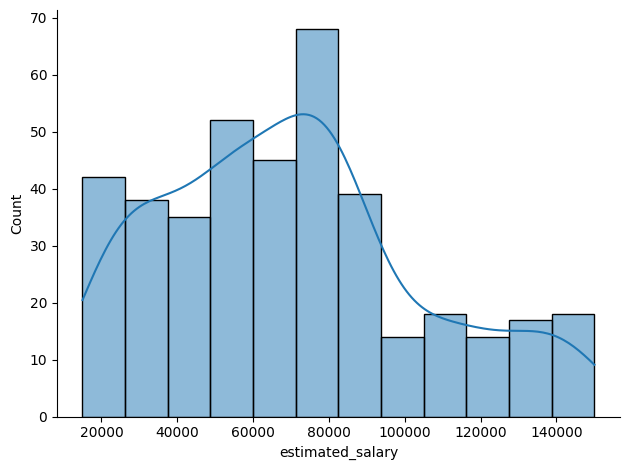

In [13]:
sns.histplot(data=df_eda,x='estimated_salary', kde='true')

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [14]:
df_eda['label'].value_counts()

label
Millennials    210
Gen Z           78
Gen X           59
Boomers         53
Name: count, dtype: int64

In [15]:
df_eda.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,400.0,37.66,10.48,18.0,29.75,37.0,46.0,60.0
estimated_salary,400.0,69742.50,34096.96,15000.0,43000.00,70000.0,88000.0,150000.0
purchased,400.0,0.36,0.48,0.0,0.00,0.0,1.0,1.0


Text(0.5, 1.0, 'Correlation between Features')

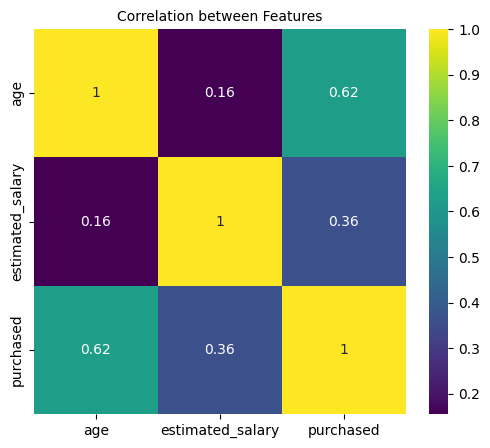

In [16]:
#Correlation between Features

plt.figure(figsize=(6,5))
sns.heatmap(df_eda[['age', 'estimated_salary', 'purchased']].corr(),annot=True,cmap='viridis')
plt.title("Correlation between Features", fontsize=10)

In [17]:
# % of gen on dataset
df_eda['label'].value_counts(normalize=True).round(2)*100

label
Millennials    52.0
Gen Z          20.0
Gen X          15.0
Boomers        13.0
Name: proportion, dtype: float64

### **Purchase Analysis**
i. Purchase View - % of people who bought or not

ii. Purchase x Age - between Age (Generation) and Purchase

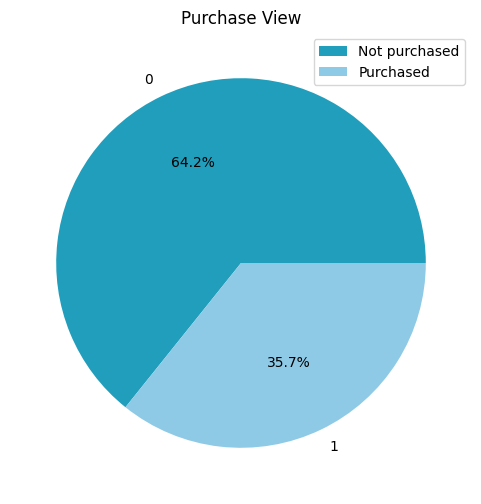

In [18]:
# Purchased %

colors = ['#219ebc','#8ecae6']
purchased_cat = ["0", "1"] 
purchased_catcount = df_eda["purchased"].value_counts().values
fig, ax = plt.subplots(figsize=(7, 6))
ax.pie(x=df_eda["purchased"].value_counts().values, labels=purchased_cat, autopct="%1.1f%%",colors=colors)
plt.title("Purchase View", fontsize=12)
ax.legend(labels=["Not purchased", "Purchased"], loc="best");

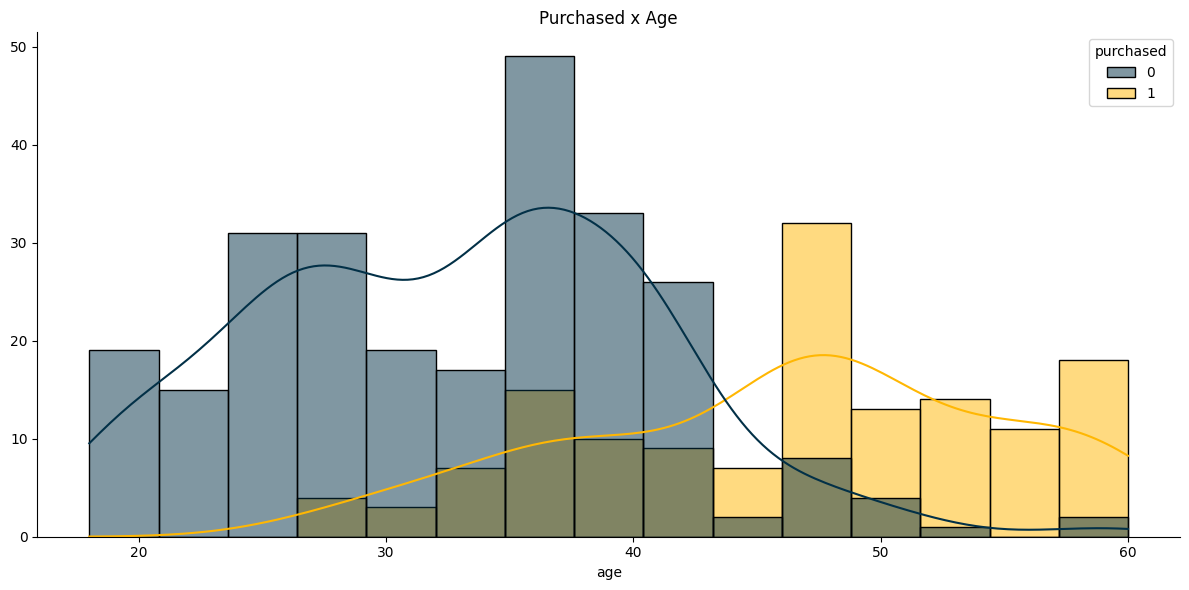

In [19]:
colors = ['#023047','#ffb703']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax = sns.histplot(data=df_eda, x='age', hue='purchased', palette=colors, kde=True, ax=ax, bins=15)
ax.set_ylabel('',fontsize=14)
ax.set_title('Purchased x Age',fontsize=12)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

<Figure size 2000x2000 with 0 Axes>

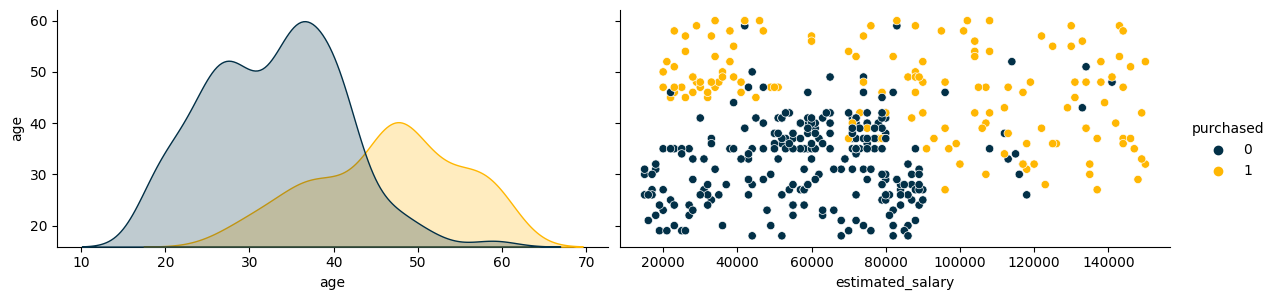

In [20]:
colors = ['#023047','#ffb703']

plt.figure(figsize=(20,20))
pairplot = sns.pairplot(data=df_eda, x_vars= ['age','estimated_salary'], y_vars='age', hue='purchased',palette=colors, aspect=2, height=3)

sns.despine(left=False, right=True, top=True, bottom=False)

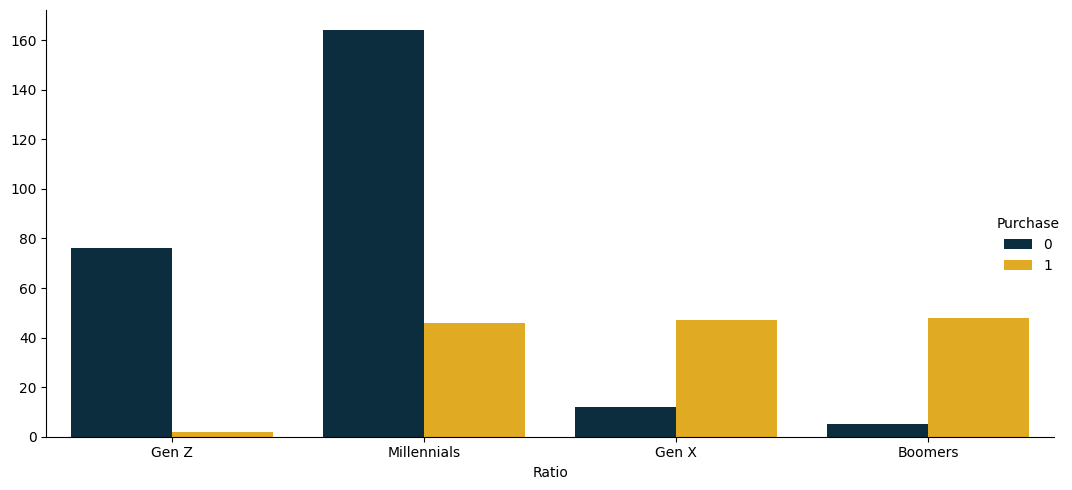

In [21]:
#Generation x Purchased %
custom_colors = ['#023047','#ffb703']


ax = sns.catplot(data=df_eda, x='label',hue="purchased", legend=False,  kind ='count', palette=custom_colors)

ax.figure.set_size_inches(10, 5)
ax.set_ylabels("",fontsize=0)
ax.add_legend(title='Purchase')
ax.set_xlabels("Ratio",fontsize=10)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [22]:
print(df_eda.groupby('label')['purchased'].value_counts(normalize=True).round(4)*100)

label        purchased
Boomers      1            90.57
             0             9.43
Gen X        1            79.66
             0            20.34
Gen Z        0            97.44
             1             2.56
Millennials  0            78.10
             1            21.90
Name: proportion, dtype: float64


### **Salary Analysis**

i. Estimated Salary by Generation - Comparison between groups and AVG salary per Generation

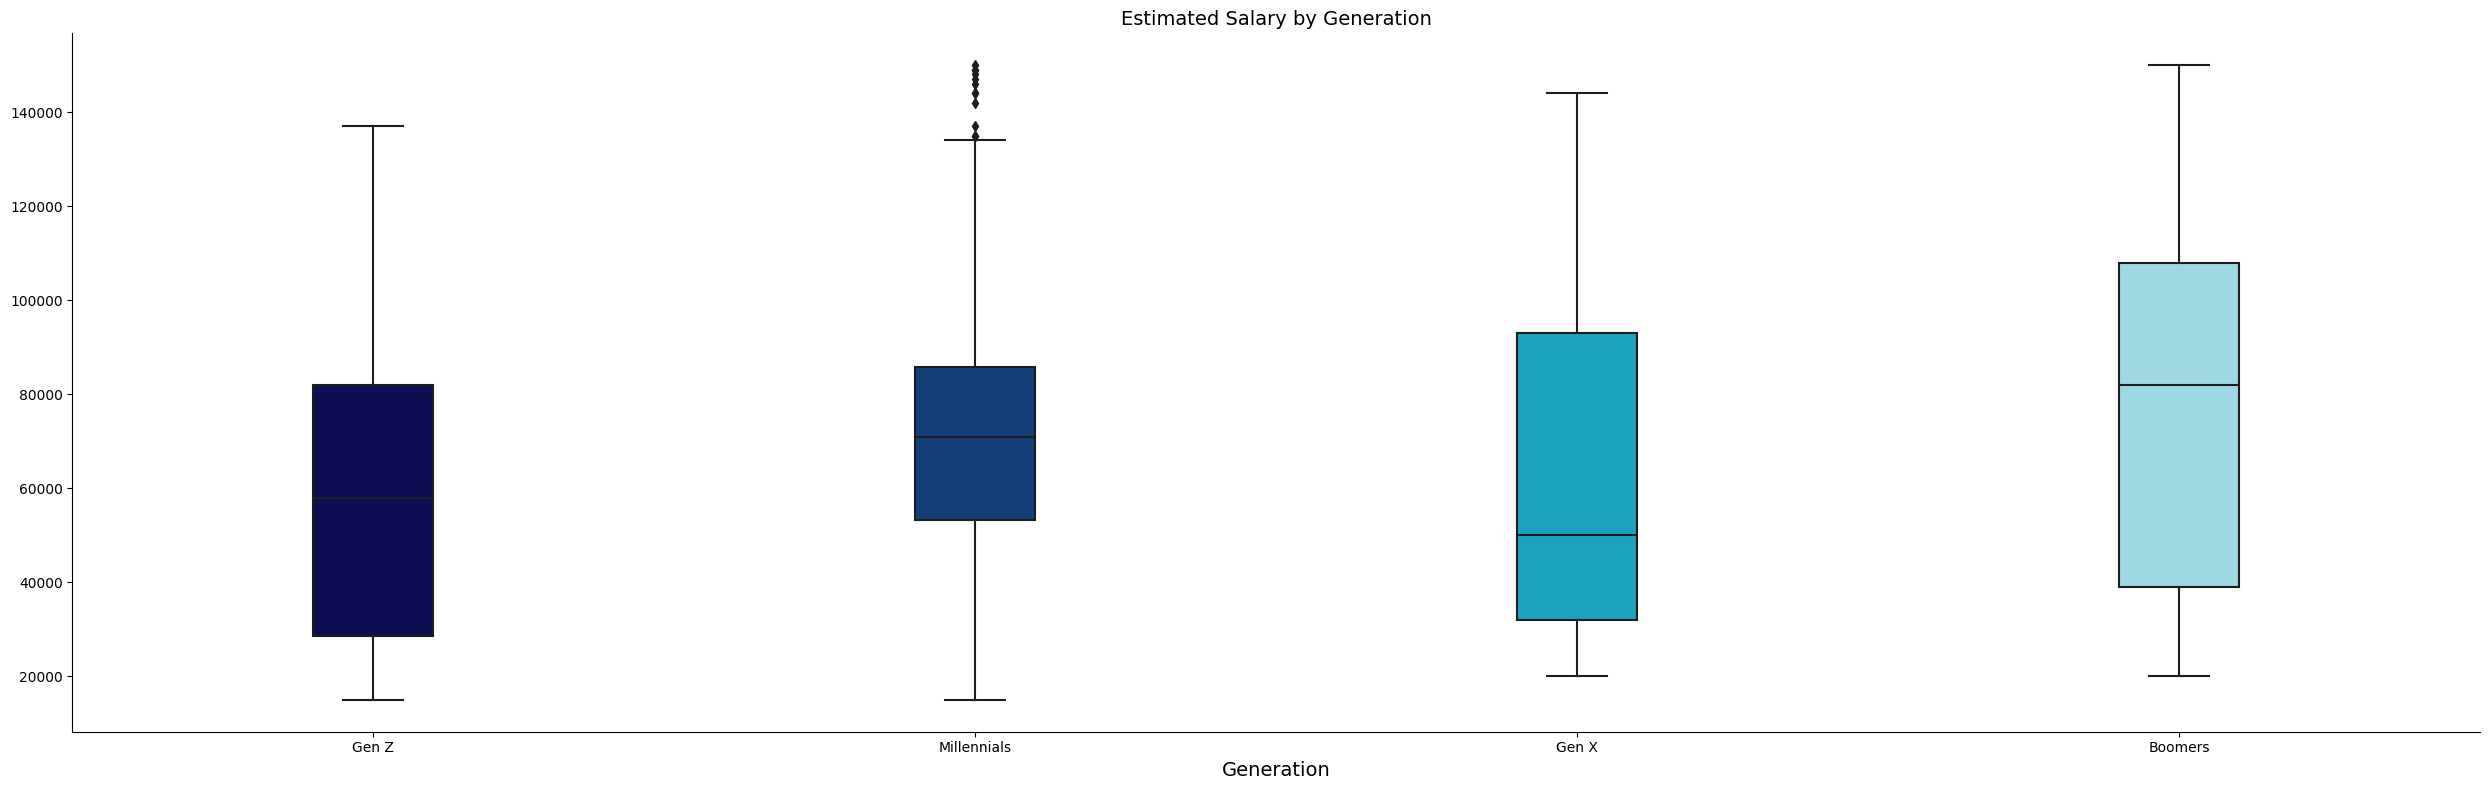

In [23]:
# Estimated Salary x Genenation

custom_colors = ['#03045e','#023e8a','#00b4d8','#90e0ef','#caf0f8']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))

# Plot chart using Seaborn
sns.boxplot(data =df_eda, y='estimated_salary', x='label', orient='v', width=0.2, ax=ax, palette= custom_colors)
ax.set_title('Estimated Salary by Generation', fontsize=14)
ax.set_ylabel('',fontsize=14)
ax.set_xlabel('Generation',fontsize=14)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [24]:
#AVG Salary per Generation

salary_label = df_eda.groupby('label')['estimated_salary'].mean().round(2).reset_index().sort_values(by='estimated_salary')

for index,rows in salary_label.iterrows():
    print(f'{rows["label"]} - {rows["estimated_salary"]}')

Gen Z - 57038.46
Gen X - 66355.93
Millennials - 73076.19
Boomers - 79000.0


**Insights:**
--

### **Statistics**:
* The data has a positive skew and no outliers in general.
* It has considerably more data from Millennials than other gens.
* There's a strong correlation between Age and Purchased.

### **Age and Purchase Behavior**:
* The percerntage of people who purchased is lower
* Older people tend to purchase more than young people independently of ecnonomic background.
* Millennials purchased as much as older generations while Gen Z shows almost no purchases (It needs further adjustment since the dataset has more data on Millennials).

### **Estimated Salary and Generations:**
* The Average salary of Millenniais is highter than their former Generation.

### **Strategies:**
* The ads could use a different strategy to capture the attention of young people. 

# **ML Models**

## **Data Mining**

In [25]:
df_machine_learning = df[['age','estimated_salary','purchased']] # dataframe for Machine Learning models
df_machine_learning

,age,estimated_salary,purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### **Adjusting the data**

i. Count of TRUE and FALSE shows that the categories are unbalanced

ii. For a better adjustment of the models, the dataset will be balanced by using the SMOTE method.

<Axes: xlabel='purchased', ylabel='count'>

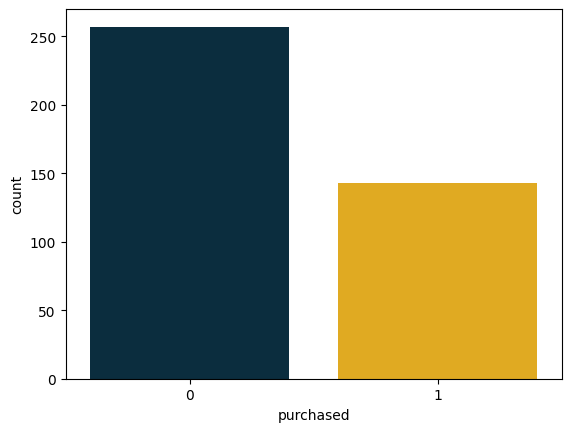

In [26]:
custom_colors = ['#023047','#ffb703']

sns.countplot(data=df_machine_learning, x='purchased', palette=custom_colors)

In [27]:
from imblearn.over_sampling import SMOTE

x = df_machine_learning.drop('purchased', axis = 1)
y = df_machine_learning['purchased']

smt = SMOTE(random_state=123)
x, y = smt.fit_resample(x, y)  # re-sampling the dataset based on the original data. It creates new samples that are added to the data and can be used to help to train the model

df_ml = pd.concat([x, y], axis=1)

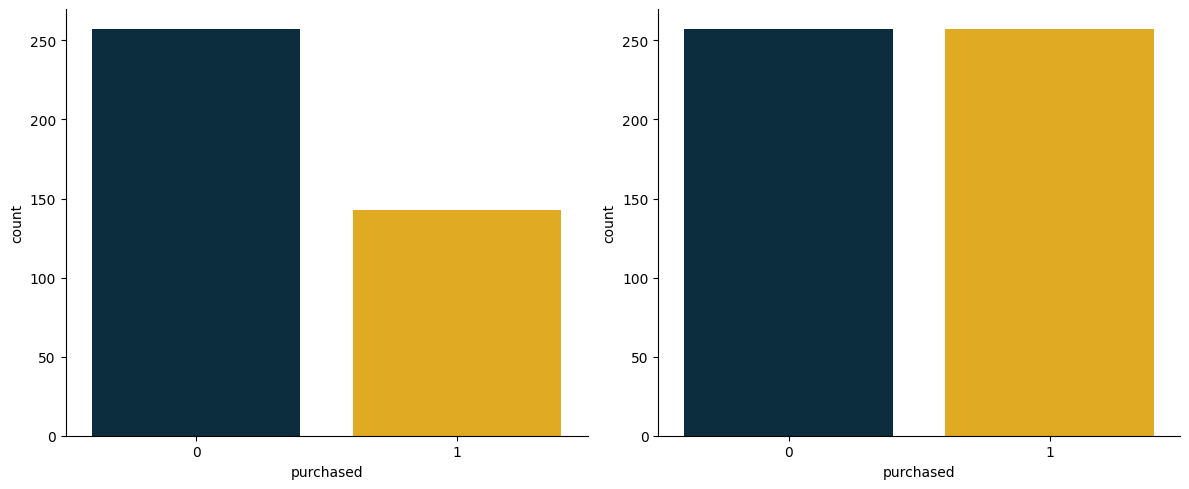

In [28]:
custom_colors = ['#023047','#ffb703']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0] = sns.countplot(data=df_machine_learning, x='purchased', ax=ax[0], palette=custom_colors)
ax[1] = sns.countplot(data=df_ml, x='purchased', ax=ax[1], palette=custom_colors)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

## **Model Preparation (Feature Engineering, training)**

i. Importing and training Dummies and Models

ii. Testing the models and measuring the accuracy and other metrics

In [29]:
## models
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
## Dividing the dataframe between training and testing data
x = df_ml.drop('purchased', axis = 1)
y = df_ml['purchased']

### **Classification Models**

i. Dummies: they use random data to test if random predictions are good or not.

ii. KNN normalized: the normal KNN algorithm but enhanced with the normalization of the data since it's dealing with distances between the X variables.

iii. Decision Tree classifier method and its Tree of decisions showing what the algorith is doing in the background.

### **Metrics:**
    * Accuracy Score – It measures the general performance of the model;
    * Precision – It measures the performance based on how many true values were predicted correctly;
    * Recall – It calculates how sensitive the model is and how good it is to calculate true positive results.
    * F1 score - It indicates the reliability of the model. It's the harmonic mean of the precision and recall.
        



In [32]:
# i. Dummy - Getting the most frequent class

from sklearn.dummy import DummyClassifier

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, stratify = y, random_state=123)

dummy_mostfrequent = DummyClassifier(strategy='most_frequent')

dummy_mostfrequent.fit(train_x, train_y)
predict_freq = dummy_mostfrequent.predict(test_x)

class_atrix = classification_report(test_y,predict_freq)
print(class_atrix)
print(f'Accuracy - {accuracy_score(test_y, predict_freq).round(4)*100}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.50      1.00      0.66        77

    accuracy                           0.50       155
   macro avg       0.25      0.50      0.33       155
weighted avg       0.25      0.50      0.33       155

Accuracy - 49.68


In [33]:
# i. Dummy - Respecting the division of train and test data

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")

dummy_stratified.fit(train_x, train_y)
predict_stra = dummy_stratified.predict(test_x)

class_atrix = classification_report(test_y,predict_stra)
print(class_atrix)
print(f'Accuracy - {accuracy_score(test_y, predict_stra).round(2)*100}')

              precision    recall  f1-score   support

           0       0.51      0.54      0.52        78
           1       0.50      0.47      0.48        77

    accuracy                           0.50       155
   macro avg       0.50      0.50      0.50       155
weighted avg       0.50      0.50      0.50       155

Accuracy - 50.0


In [34]:
# ii. KNN - Normalized data

np.random.seed(123)

from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

x_normalized = norm.fit_transform(x)

from sklearn.neighbors import KNeighborsClassifier as knn

train_x, test_x, train_y, test_y = train_test_split(x_normalized, y, test_size = 0.3, stratify = y)

knn_norm = knn(metric='euclidean')

knn_norm.fit(train_x, train_y)
predict_knn_norm = knn_norm.predict(test_x)

class_atrix = classification_report(test_y,predict_knn_norm)
print(class_atrix)
print(f'Accuracy - {accuracy_score(test_y, predict_knn_norm).round(4)*100}')

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        78
           1       0.86      0.91      0.89        77

    accuracy                           0.88       155
   macro avg       0.88      0.88      0.88       155
weighted avg       0.88      0.88      0.88       155

Accuracy - 88.39


In [35]:
# iii. Decision Tree

np.random.seed(123)

from sklearn.tree import DecisionTreeClassifier

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, stratify = y)

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
tree.fit(train_x, train_y)
predict_tree = tree.predict(test_x)

class_atrix = classification_report(test_y,predict_tree)
print(class_atrix)
print(f'Accuracy - {accuracy_score(test_y, predict_tree).round(4)*100}')

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        78
           1       0.91      0.88      0.89        77

    accuracy                           0.90       155
   macro avg       0.90      0.90      0.90       155
weighted avg       0.90      0.90      0.90       155

Accuracy - 89.68


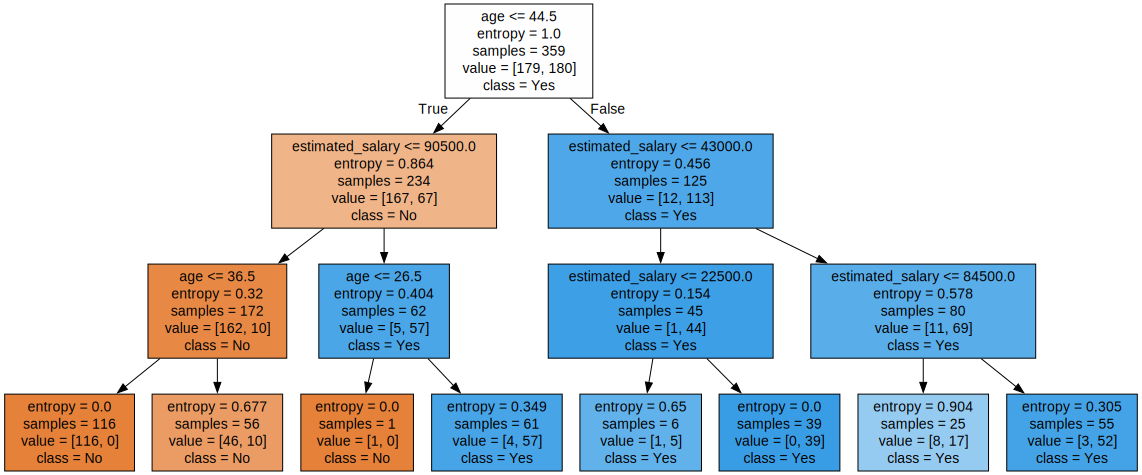

In [36]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(tree, out_file=None, feature_names= features, filled = True, class_names=['No', 'Yes'])
graph = graphviz.Source(dot_data)
graph

## **Model Testing**

In [37]:
# KNN - Wrong
age = 36
estimated_salary = 33000
input_d = [[age,estimated_salary]]

knn_norm.predict(input_d)[0]

1

In [38]:
# KNN - Wrong
age = 49
estimated_salary = 36000
input_d = [[age,estimated_salary]]

knn_norm.predict(input_d)[0]

1

In [39]:
# Decision Tree - Correct
age = 49
estimated_salary = 36000
input_d = [[age,estimated_salary]]

tree.predict(input_d)[0]

1

In [40]:
# Decision Tree - Correct
age = 36
estimated_salary = 33000
input_d = [[age,estimated_salary]]

tree.predict(input_d)[0]

0

------------------

## **Model Definition & Insights:**
--

### **Statistics**:
* The data has considerably more data on Millennials 📈 (`0.52`) than other generations.
* There's a high correlation between Age and Purchased 📈 (`0.62`).

### **Age and Purchase Behavior**:
* The percerntage of people who purchased is lower.
* Older people tend to purchase more than young people regardless of ecnonomic background.

### **Strategies:**
* The ads could use a different strategy to capture the attention of young people. 

### **Classification Models:**
--

Both models perform well howerver the Decision Tree Classifier leaves the KNN behind by 2% on AVG. Howerver when tested with samples of the dataset we could see that the KNN predicted values incorrectly. Perhaps it needs more adjustments.
The Decision Tree predicted the values correctly and has a better score in general.

Perhaps it's possible to obtain better metrics using regression models. This can be implemented in the future.

# **Thank You for taking the time to view this Notebook**!
​
If you found this analysis helpful or have any feedback or suggestions, don't hesitate to say! 

#### **Contact:**

* LinkedIn - linkedin.com/in/leonardo-terra-97b592124
* Portfolio - linktr.ee/leonardoterra 